# Multiple Subplots
includes:
+ ``plt.axes([leftcoor, bottomcoor, width, height])``
+ ``fig.add_axes([leftcoor, bottomcoor, width, height])``
+ ``plt.subplot(row, col, pos)`` and ``fig.add_subplot(row, col, pos)``
+ ``plt.subplots(row, col)`` -- ``sharex`` and ``sharey``
+ ``plt.GridSpec(row, col)`` then ``plt.subplot(grid[,])``

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
``plt.axes`` also takes an optional argument representing ``[left, bottom, width, height]`` in the figure coordinate system


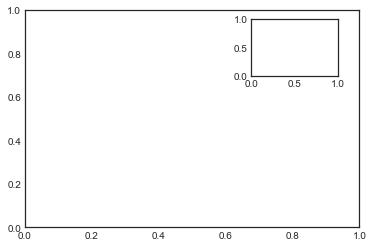

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. 

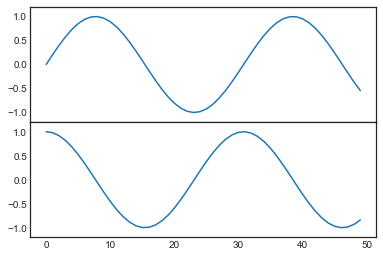

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## ``plt.subplot``: Simple Grids of Subplots

``plt.subplot()``, which creates a single subplot within a grid, running from the upper left to the bottom right:

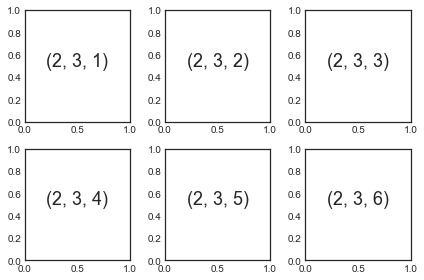

In [18]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.tight_layout() # to adjust the distance between subplots
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

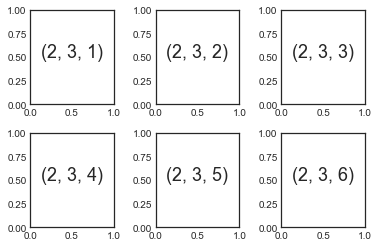

In [21]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.5)  # it means the space between subplot is 30% of the size of the plots
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## ``plt.subplots``: The Whole Grid in One Go

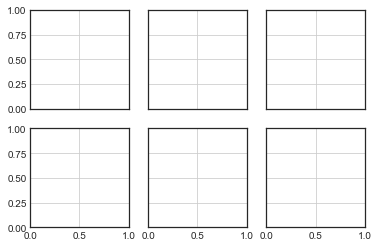

In [23]:
fig, axs = plt.subplots(2, 3, sharex='col', sharey='row')
for ind, ax in enumerate(axs.ravel()):
    ax.grid()

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

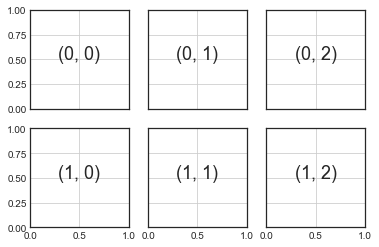

In [24]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        axs[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

## ``plt.GridSpec``: More Complicated Arrangements

In [25]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

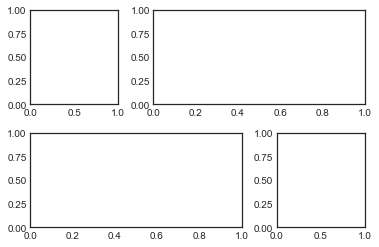

In [30]:
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
ax3 = plt.subplot(grid[1, :2])
ax4 = plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multi-axes histogram plots like the ones shown here:

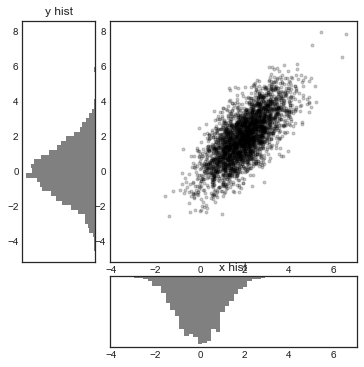

In [42]:
# note that the following plot can be generate by the API in seaborn

# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x+2, y+2, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.set_title('x hist')
x_hist.invert_yaxis()


y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.set_title('y hist')
y_hist.invert_xaxis()
